In [40]:
#Read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using *beautifulsoup* and load to a pandas dataframe.

#Data cleaning tasks include:
#1. Replace empty strings with NaN
#2. Remove the footnotes from the 'Other Source Deaths' column
#3. Convert Magnitude to a numeric
#4. Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
#5. Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

#Feel free to add data after 9/23/2011, but understand that it is not required.
#Add any supplemental data you'd like in order to explore ideas related to earthquake occurrence and effects.
#hi 

In [41]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
% matplotlib inline

from bs4 import BeautifulSoup as BS
import urllib.request
import pandas as pd
import numpy as np

In [42]:
result = urllib.request.urlopen(request)
resulttext = result.read()
earthquakesoup = BS(resulttext, 'html.parser')
earthquakesoup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of deadly earthquakes since 1900 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pages needi

In [43]:
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [44]:
print(earthquakesoup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 20

In [45]:
print(earthquakesoup.title)

<title>List of deadly earthquakes since 1900 - Wikipedia</title>


In [46]:
len(earthquakesoup.find_all('table'))

6

In [47]:
len(earthquakesoup.find_all('table', class_="sortable wikitable"))

1

In [48]:
table1 = earthquakesoup.find_all('table', class_=['sortable', 'wikitable', 'jquery-tablesorter'])
type(table1)

bs4.element.ResultSet

In [49]:
#convert the "Set" to "Tag" to be able to access the elemnts in the table
table2 = table1[0]
type(table2)

bs4.element.Tag

In [50]:
#find specific elemnts with a specific Tags <th>, <td> etc
table_header = table2.find_all("th")
type(table_header)

bs4.element.ResultSet

In [51]:
#find specific elemnts with a specific Tags <th>, <td> etc
table_header = table2.find_all("th")
type(table_header)

bs4.element.ResultSet

In [52]:
#so we have a lot of information with the th as the text, color width we just need the text so we are going to get rid of all 
#except the text
#list comprehension
header = [th.text for th in table_header]
type(header)

list

In [53]:
print(header)

['Origin (UTC)', 'Present-day country and link to Wikipedia article', 'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects', 'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths']


In [54]:
row = []
for tr in table2.find_all("tr")[1:]:
    table_rows = [td.text for td in tr.find_all("td")]
    row.append(table_rows)   
    

In [55]:
type(row)

list

In [56]:
len(row)

1340

In [57]:
#now there are two list one header and one for the rows so we need to put them together
#convert it to dataframe
#rows are data and the column are assigned under the header
earthquakes = pd.DataFrame(row, columns = header)
earthquakes

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
1,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
4,1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
9,1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


In [58]:
countries_df = gpd.read_file('data/countries.geojson')
countries_df.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,POLYGON ((-69.99693762899992 12.57758209800004...
1,Afghanistan,AFG,"POLYGON ((71.04980228700009 38.40866445000009,..."
2,Angola,AGO,(POLYGON ((11.73751945100014 -16.6925779829998...
3,Anguilla,AIA,(POLYGON ((-63.03766842399995 18.2129580750000...
4,Albania,ALB,"POLYGON ((19.74776574700007 42.57890085900007,..."


NameError: name 'gdf' is not defined

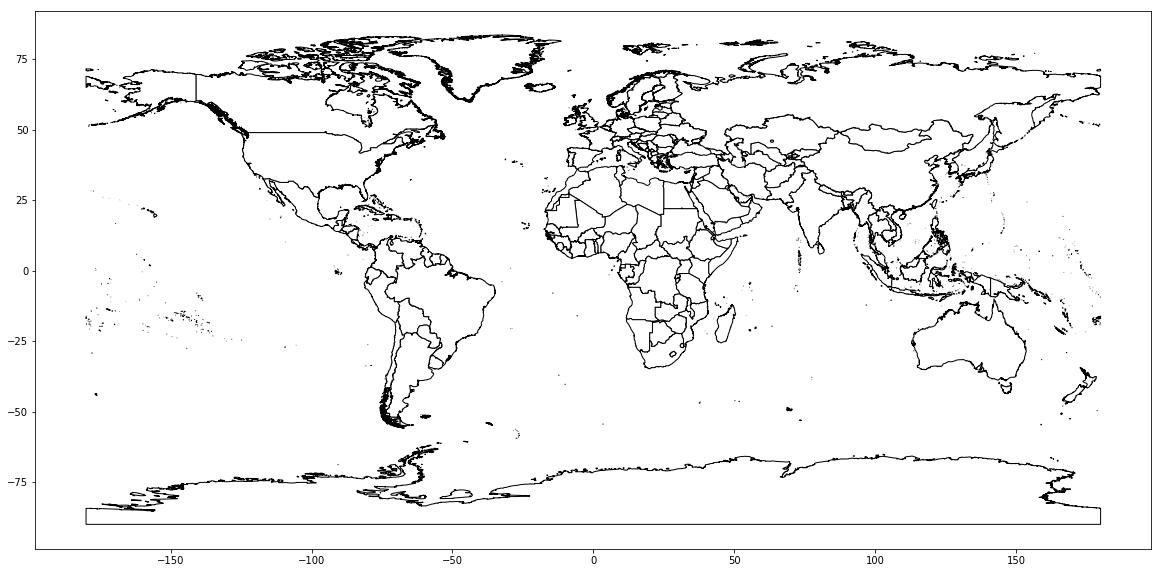

In [59]:
countries = countries_df.plot(color='white', edgecolor='black', figsize = (20, 20))

gdf.plot(ax=countries, markersize=1, figsize=(20, 20), column='Present-day country and link to Wikipedia article', label=True)